In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [80]:
def get_x(folder_name, number_images):
    x_input_points = np.zeros((0, 784))
    for i in range(1, number_images + 1): # +1 Since it's exclusive
        img_path = '{}/{}.jpg'.format(folder_name, i)
        x_input_points = np.append(x_input_points, plt.imread(img_path).reshape(1, 784), axis=0)
    # Convert it to binary with threshold 140
    x_input_points[x_input_points < 140] = 0
    x_input_points[x_input_points >= 140] = 1
    return x_input_points

In [53]:
def get_t(labels_path):
    with open(labels_path) as f:
        training_labels = [int(x) for x in f.read().splitlines()]
    return np.array(training_labels)

In [81]:
# Loading in a separate cell to avoid multiple loads.
x_input = get_x('Images', 2400)
labels = get_t('Images/Training Labels.txt')

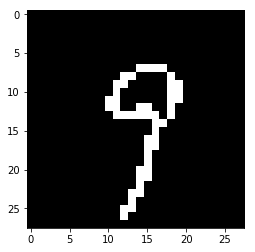

In [102]:
plt.imshow(np.split(x_input[2313], 28), cmap='gray')

In [220]:
def initialize_center_indices(images, k_number):
    number_of_images = images.shape[0]
    centers_indices = np.zeros(k_number).astype(int)
    centers_indices[0] = np.random.randint(0, number_of_images)
    
    for k in range(1, k_number):
        previous_center = x_input[centers_indices[k - 1]]
        max_so_far = {
            'index': centers_indices[k - 1],
            'value': 0
        }
        for i in range(0, number_of_images):
            diff =  (previous_center - x_input[i]) ** 2
            if sum(diff) > max_so_far['value'] and i not in centers_indices:
                max_so_far = {
                    'index': i,
                    'value': sum(diff) 
                }
        centers_indices[k] = max_so_far['index']
    return centers_indices

In [296]:
# centers_indices = initialize_center_indices(x_input, 10)
# Do this 30 times
# (centroids == temp).all()
y = np.array([1,2,3])
x = np.array([1,2,3])
(x == y).all()

True

In [305]:
# centroids = x_input[np.random.choice(np.arange(len(x_input)), 10), :]
centroids = x_input[initialize_center_indices(x_input, 10)]

K = 10
C = np.array([])
for x_i in x_input:
    C = np.append(C, np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]))

# Move centroids step
centroids = np.array([x_input[C == k].mean(axis = 0) for k in range(K)])


In [ ]:
# centroids = x_input[np.random.choice(np.arange(len(x_input)), 10), :]
centroids = x_input[initialize_center_indices(x_input, 10)]

K = 10
# for _ in range(50):
temp = False
i = 0
while(not (centroids == temp).all()):
    temp = centroids
    C = np.array([])
    for x_i in x_input:
        C = np.append(C, np.argmin([np.dot(x_i-y_k, x_i-y_k) for y_k in centroids]))

    # Move centroids step
    centroids = np.array([x_input[C == k].mean(axis = 0) for k in range(K)])
    i+=1

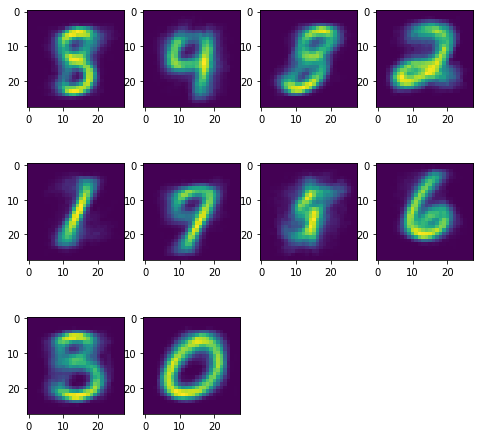

In [304]:
fig=plt.figure(figsize=(8, 8))

for i in range(0,10):
    fig.add_subplot(3, 4, i+1)
    plt.imshow(np.split(centroids[i], 28))
plt.show()